In [1]:
import cython
%load_ext cython

import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation

plt.style.use('seaborn-pastel')

In [2]:
class subcluster:
    def __init__(self, points=[]) -> None:
        self.points = points
        pass
    
    def size(self):
        return len(self.points)

    def add_point(self, point):
        if point in self.points:
            return
        self.points.append(point)
        return
    
    def add_points(self, points):
        for point in points:
            self.add_point(point)
        return
    
    #def show(self):




In [4]:
def print_cluster(cluster, connections, radius):
    
    x = cluster[0,:] * np.cos(cluster[1,:])
    y = cluster[0,:] * np.sin(cluster[1,:])
    ax = plt.gca()
    ax.plot(x, y, "o", color="black")
    circ = plt.Circle((0,0), radius, color='b', fill=False)
    ax.add_patch(circ)
    ax.set_xlim([-radius,radius])
    ax.set_ylim([-radius,radius])
    for j in range(len(cluster[0,:])):
        for k in connections[j]:
            ax.plot([x[j], x[k]], [y[j], y[k]], color="blue")
    plt.show()
    return

def create_subcluster_from_seed(cluster, connections, seed_index):
    sub_cluster = subcluster([seed_index])
    for connection in connections[seed_index]:
        sub_cluster.add_point(connection)
        sub_cluster.join()
    return sub_cluster


In [5]:
%%cython
from libc.math cimport sin, cos, sqrt

def all_connections(cluster, radius_shell, delta_shell):
    """
    this function returns a list of lists with all the possible connection between points.
    arg:
        cluster: np.array() 2xN_points.
        radius_shell: double. Radius of the facilitation shell.
        delta_shell: double. width of the facilitation shell. 
    
    returns:
        possible_connections: list of lists. the first index run on the points. the second index on all the connection with that point.
    """
    cdef int N = 0
    cdef double x_i, x_j, y_i, y_j, distance
    cdef list possible_connections = []
    for i in range(len(cluster[0,:])):
        possible_connections.append([])
        for j in range(i+1, len(cluster[0,:])):
            if (cluster[0,i]-cluster[0,j])>radius_shell:
                j = len(cluster[0,:])
            x_i = cluster[0,i]*cos(cluster[1,i])
            x_j = cluster[0,j]*cos(cluster[1,j])
            y_i = cluster[0,i]*sin(cluster[1,i])
            y_j = cluster[0,j]*sin(cluster[1,j])
            distance = sqrt((x_i-x_j)**2 + (y_i - y_j)**2)
            if distance < radius_shell and distance > (radius_shell-delta_shell):
                possible_connections[i].append(j)
                N = N+1
    return possible_connections

def witch_bin(x,y, ):
    

In [6]:
radius_space = 60
radius_shell = 6
delta_shell = 0.2
N_points = 5000

random_r = (np.random.random(N_points) + np.random.random(N_points)) * radius_space
random_r = [random_r[i] if random_r[i] < radius_space else 2*radius_space-random_r[i] for i in range(len(random_r))]
random_theta = np.random.random(N_points)*2*np.pi
random_x = random_r*np.cos(random_theta)
random_y = random_r*np.sin(random_theta)

binned = [witch_bin(r) for r in random_r]
cluster = np.reshape(list(np.sort(random_r)) + list(np.random.random(N_points)*2*np.pi), (2, N_points))

#x, y = np.reshape(np.random.normal(0, radius_space, 2*N_points),(2, N_points))
#gaussian_cluster = np.array([[x[i]**2 + y[i]**2, np.arctan(y[i]/x[i])] for i in range(N_points)])

In [8]:
connections = all_connections(cluster, radius_shell, delta_shell)

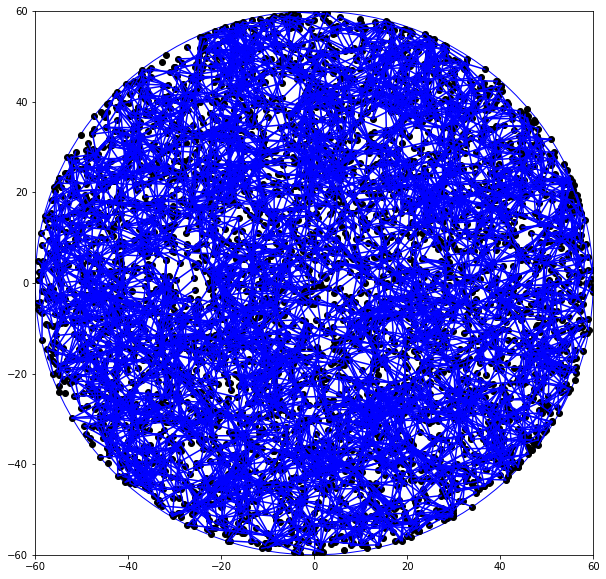

In [22]:
print_cluster(cluster, connections, radius_space)

(array([ 47., 150., 273., 332., 451., 556., 655., 746., 851., 939.]),
 array([ 0.80109794,  6.72064728, 12.64019662, 18.55974596, 24.47929529,
        30.39884463, 36.31839397, 42.23794331, 48.15749265, 54.07704199,
        59.99659133]),
 <BarContainer object of 10 artists>)

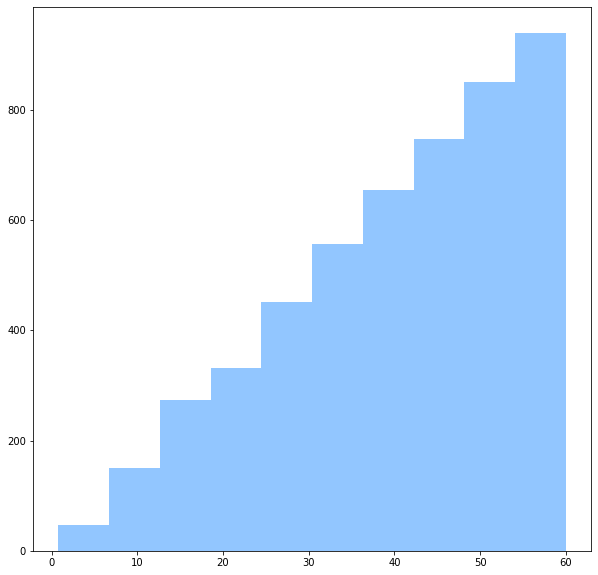

In [25]:
plt.hist(cluster[0,:])

(array([479., 497., 494., 516., 467., 531., 525., 483., 521., 487.]),
 array([2.91889175e-04, 6.28561146e-01, 1.25683040e+00, 1.88509966e+00,
        2.51336892e+00, 3.14163817e+00, 3.76990743e+00, 4.39817669e+00,
        5.02644594e+00, 5.65471520e+00, 6.28298446e+00]),
 <BarContainer object of 10 artists>)

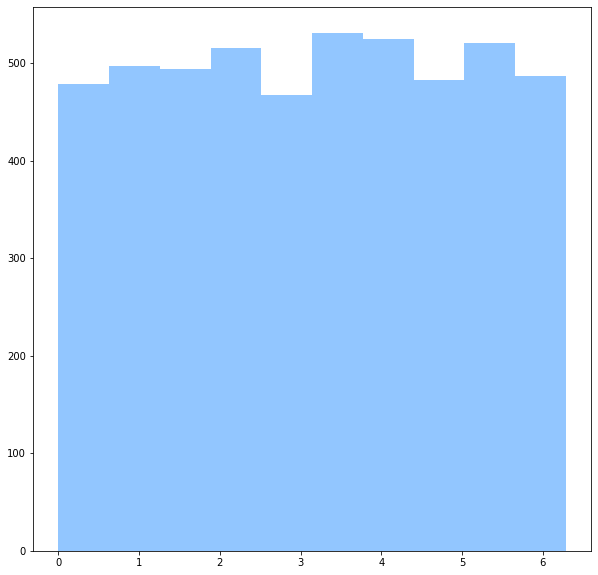

In [26]:
plt.hist(cluster[1,:])